In [ ]:
# Tratamento dos dados
import numpy as np
import pandas as pd

# Modelos de Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import plot_tree

from sklearn.preprocessing import StandardScaler, MinMaxScaler;

# Métricas de avaliação
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, ConfusionMatrixDisplay, RocCurveDisplay, confusion_matrix, classification_report, plot_roc_curve

# Plot dos gráficos
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import colors
import seaborn as sns

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

### Passo zero: Carregar dados e Realizar a Análise Exploratória

Para importar dados do OpenML podemos usar uma função pronta na biblioteca do Scikit-Learn:

In [ ]:
# Armazenandos os dados em um DataFrame
# para receber os dados o sep teve como argumento o valor ','. Isso ocorreu devido a 
df = pd.read_csv("coluna_vertebral.csv", sep = ',') 

In [ ]:
df.head()

,V1,V2,V3,V4,V5,V6,diagnostic
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985136,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   V1          310 non-null    float64
 1   V2          310 non-null    float64
 2   V3          310 non-null    float64
 3   V4          310 non-null    float64
 4   V5          310 non-null    float64
 5   V6          310 non-null    float64
 6   diagnostic  310 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 17.1 KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


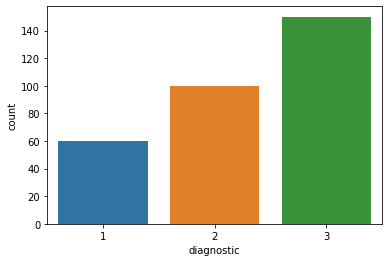

In [ ]:
sns.countplot(df["diagnostic"])

In [ ]:
df.groupby("diagnostic").size()

diagnostic
1     60
2    100
3    150
dtype: int64

In [ ]:
df['diagnostic'].replace({ 1:'Disk Hernia',2:'Normal',3:'Spondylolisthesis'}, inplace = True)

In [ ]:
df.head()

,V1,V2,V3,V4,V5,V6,diagnostic
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Disk Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Disk Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985136,-3.530317,Disk Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Disk Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Disk Hernia


In [ ]:
df.describe()

,V1,V2,V3,V4,V5,V6
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767933
75%,72.877696,22.120395,63.000000,52.695889,125.467675,41.287352
max,129.834041,49.431864,125.742386,121.429566,163.071041,418.543082


Vamos gerar algumas estatísticas e visualizações exploratórias dos dados:

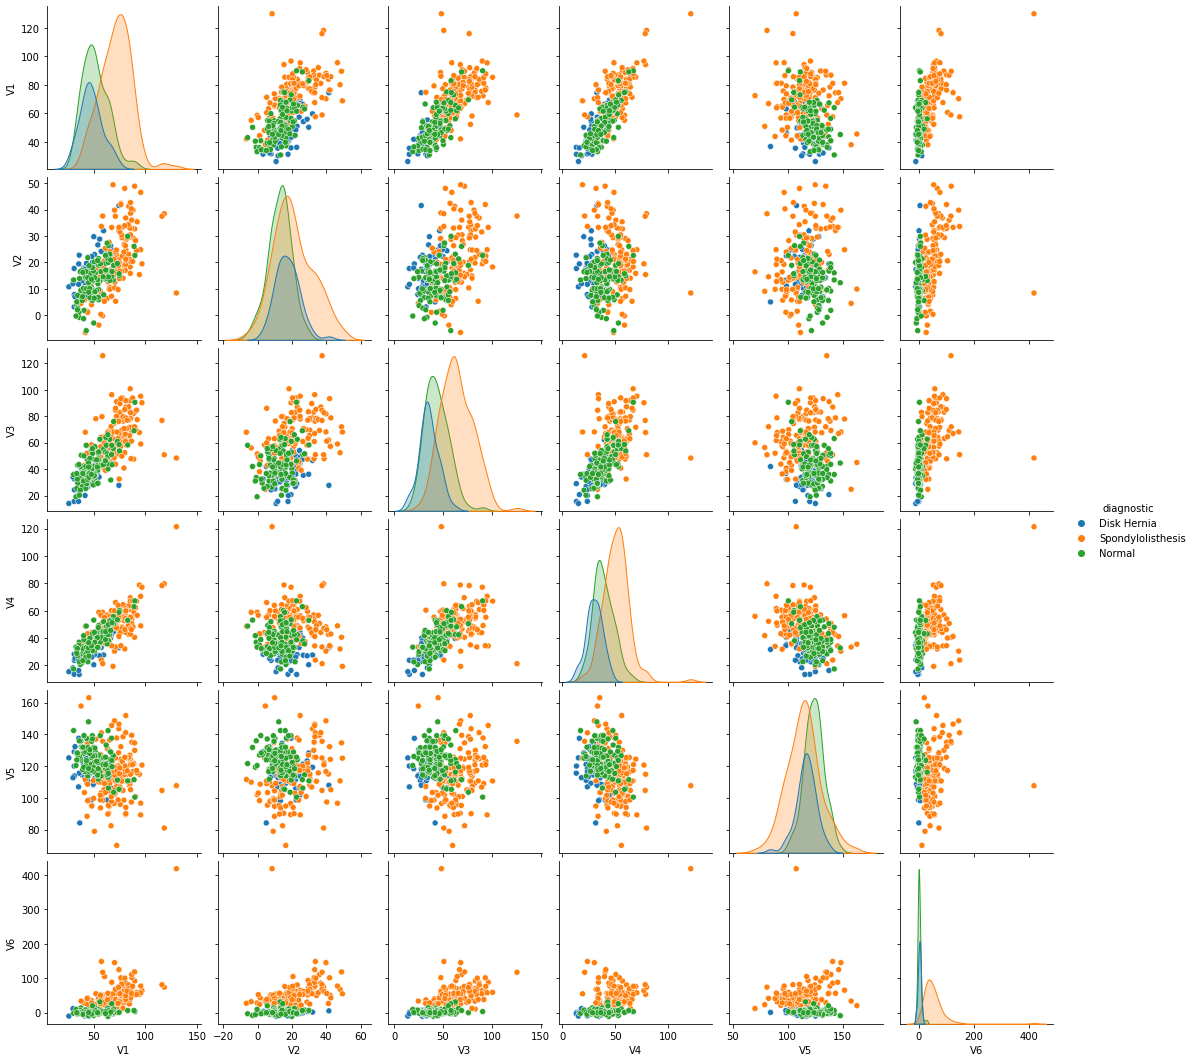

In [ ]:
sns.pairplot(df, hue='diagnostic')

Aparentemente os dados de pessoas normais e de hernia de disco estão muito sobrepostos, o que indica que talvez esse conjunto de dados não seja bom o suficiente para separar essas duas classes. Assim, iremos unir essas duas classes em casos em que a pessoa não possui Spondylolisthesis para averiguar desempenho do classificador

In [ ]:
df['diagnostic'] = df['diagnostic'].replace({'Disk Hernia' : 'Normal'})

In [ ]:
df.groupby('diagnostic').mean()

,V1,V2,V3,V4,V5,V6
diagnostic,,,,,,
Normal,50.167680,14.537932,40.512949,35.629748,121.109885,2.296701
Spondylolisthesis,71.514224,20.748038,64.110108,50.766186,114.518810,51.896687


In [ ]:
df.groupby('diagnostic').std()

,V1,V2,V3,V4,V5,V6
diagnostic,,,,,,
Normal,11.898309,7.198617,12.080560,9.818035,9.800193,6.012003
Spondylolisthesis,15.109337,11.506169,16.397068,12.318813,15.579995,40.108030


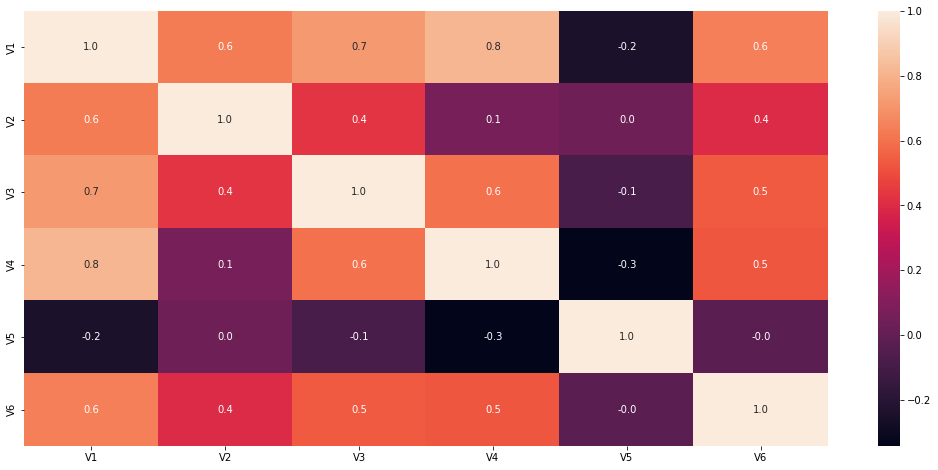

In [ ]:
plt.figure(figsize=(18,8))
sns.heatmap(df.corr(method = 'pearson'), annot=True, fmt=".1f")

In [ ]:
df.isnull().sum()

V1            0
V2            0
V3            0
V4            0
V5            0
V6            0
diagnostic    0
dtype: int64

# Criando os modelos para classificação

Divindo os dados do nosso modelo

In [ ]:
# Dividindo o conjunto de dados de treinamento e de teste
X = df.drop(columns = ['diagnostic'])
y = df['diagnostic']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

-- EXTRA: Trabalhando com datasets desbalanceados:

Quando um dataset está desbalanceado, podemos aplicar técnicas pra ajustá-lo e torná-lo balanceado. Um dataset é considerado desbalanceado quando uma das classes tem muito mais exemplos do que as outras classes, fazendo com qe os essa desproporção dos dados prejudique os modelos de Machine Learning.

No nosse exemplo os dados não estão desbalanceados a ponto de se tornar necessário ajustá-los, mas iremos fazer isso para exemplificar o procedimento.

Iremos usar o RandomOverSampler e o Random UnderSampler para o ajuste do balanceamento dos dados. O primeiro irá aumentar o exemplo de dados das classes minoritárias copiando dados de exemplos existentes no conjunto de dados, enquanto o segundo irá remover dados aletatórios de todas as classes, com excessão da classe minoritária.

In [ ]:
under_sampler = RandomUnderSampler(random_state=42)
X_train_u, y_train_u = under_sampler.fit_resample(X_train, y_train)

In [ ]:
over_sampler = RandomOverSampler(random_state=42)
X_train_b, y_train_b = over_sampler.fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


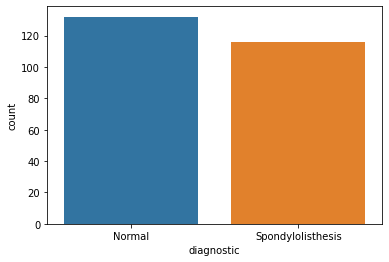

In [ ]:
sns.countplot(y_train)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


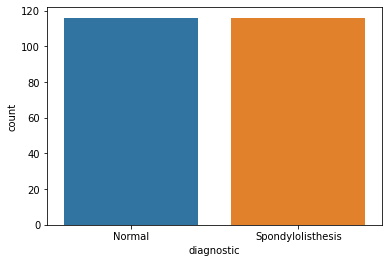

In [ ]:
sns.countplot(y_train_u)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


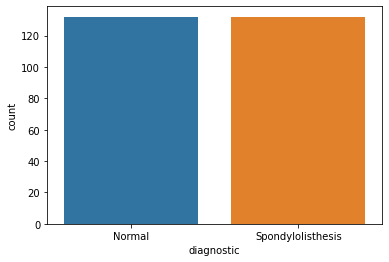

In [ ]:
sns.countplot(y_train_b)

-- EXTRA: Trabalhando com datasets desbalanceados:

In [ ]:
scale = StandardScaler().fit(X_train)

X_train = scale.transform(X_train)
X_test = scale.transform(X_test)

# Treinando os modelos de IA:

Árvore de Decisão:

In [ ]:
clf_Arvore_Decisao = DecisionTreeClassifier(min_samples_split = 4)
clf_Arvore_Decisao.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_split=4)

In [ ]:
y_pred_AD = clf_Arvore_Decisao.predict(X_test)

Random Forest:

In [ ]:
clf_RFC = RandomForestClassifier(min_samples_split = 8, n_estimators = 97)
clf_RFC.fit(X_train,y_train)

RandomForestClassifier(min_samples_split=8, n_estimators=97)

In [ ]:
y_pred_RFC = clf_RFC.predict(X_test)

SVM:

In [ ]:
clf_SVM = SVC(kernel = 'rbf')
clf_SVM.fit(X_train,y_train)

SVC()

In [ ]:
y_pred_SVM = clf_SVM.predict(X_test)

Gaussiano

In [ ]:
clf_Gaussiano = GaussianNB()
clf_Gaussiano.fit(X_train,y_train)

GaussianNB()

In [ ]:
y_pred_Gaussiano = clf_Gaussiano.predict(X_test)

Discriminante Linear:

In [ ]:
clf_LDA = LinearDiscriminantAnalysis()
clf_LDA.fit(X_train,y_train)

LinearDiscriminantAnalysis()

In [ ]:
y_pred_LDA = clf_LDA.predict(X_test)

Discriminante Quadratico:

In [ ]:
clf_QDA = QuadraticDiscriminantAnalysis()
clf_QDA.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis()

In [ ]:
y_pred_QDA = clf_QDA.predict(X_test)

Gradient Boosting Classifier

In [ ]:
clf_GBC = GradientBoostingClassifier(min_samples_split = 6, n_estimators = 87)
clf_GBC.fit(X_train,y_train)

GradientBoostingClassifier(min_samples_split=6, n_estimators=87)

In [ ]:
y_pred_GBC = clf_GBC.predict(X_test)

# Métricas de Desempenho

In [ ]:
labels_classificadores = ['Normal','Spondylolisthesis']

In [ ]:
cm_AD = confusion_matrix(y_test,y_pred_AD, labels = labels_classificadores)
cm_RFC = confusion_matrix(y_test,y_pred_RFC, labels = labels_classificadores)
cm_SVM = confusion_matrix(y_test,y_pred_SVM, labels = labels_classificadores)
cm_Gaussiano = confusion_matrix(y_test,y_pred_Gaussiano, labels = labels_classificadores)
cm_LDA = confusion_matrix(y_test,y_pred_LDA, labels = labels_classificadores)
cm_QDA = confusion_matrix(y_test,y_pred_QDA, labels = labels_classificadores)
cm_GBC = confusion_matrix(y_test,y_pred_GBC, labels = labels_classificadores)

In [ ]:
matrizes_confusao = {'Arvore de Decisao' : cm_AD,
                     'Random Forest' : cm_RFC,
                     'SVM' : cm_SVM,
                     'Gaussiano' : cm_Gaussiano,
                     'LDA' : cm_LDA,
                     'QDA' : cm_QDA,
                     'GBC' : cm_GBC}

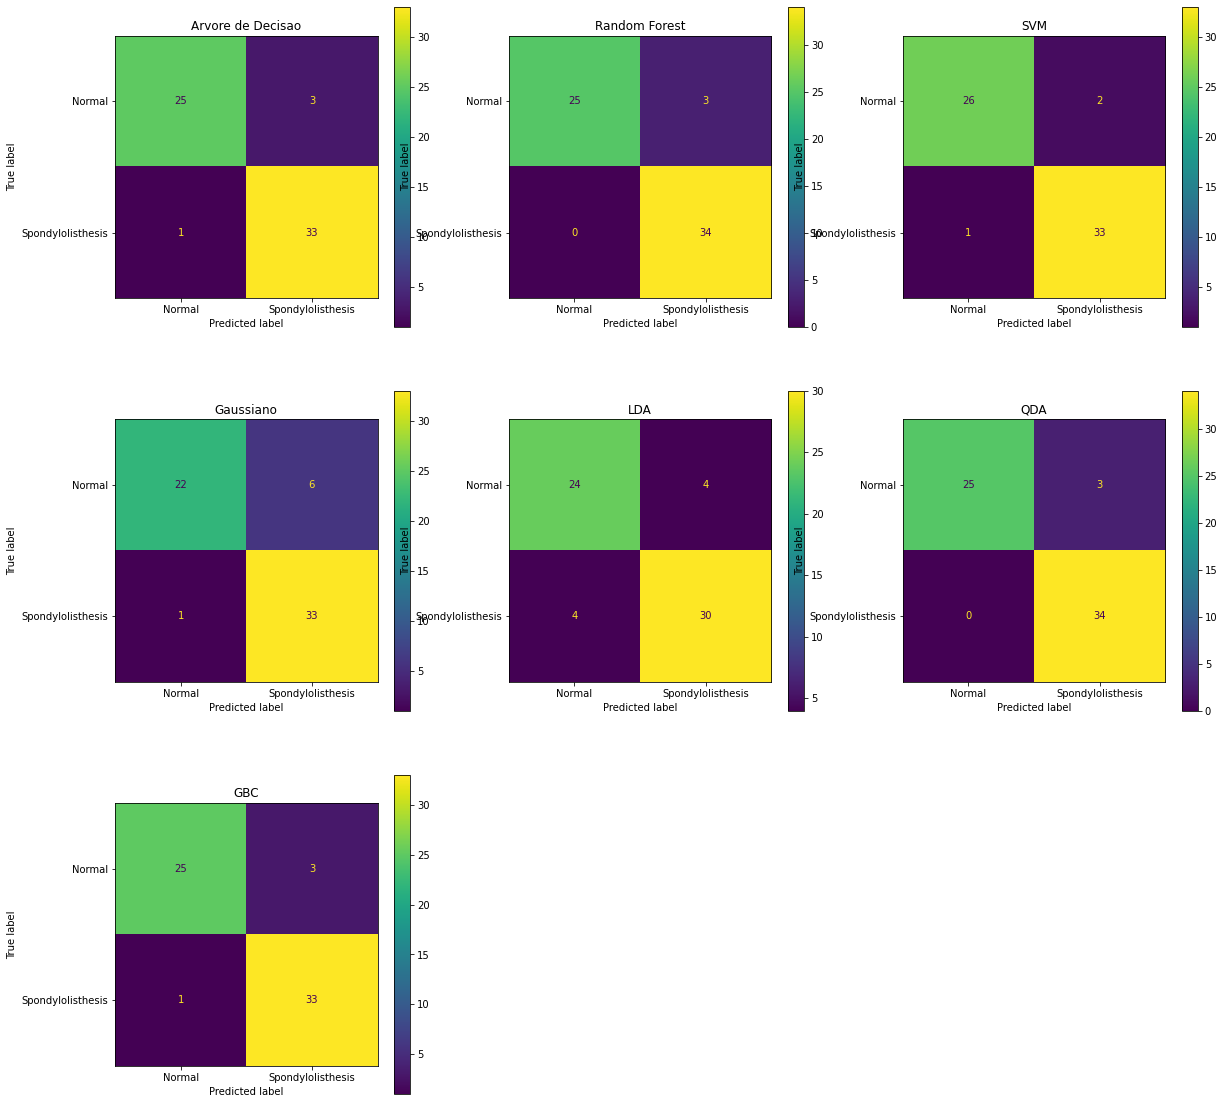

In [ ]:
# Plotando as matrizes de confusão
figure = plt.figure(figsize = (20,20))

for i, (nome_clf, cm) in enumerate(matrizes_confusao.items()):
  disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels= labels_classificadores)
  ax = plt.subplot(3,3,i+1)
  disp.plot(ax=ax,values_format = "d")
  ax.set_title(nome_clf)

In [ ]:
previsoes_modelos = {'Arvore de Decisao' : y_pred_AD,
                     'Random Forest' : y_pred_RFC,
                     'SVM' : y_pred_SVM,
                     'Gaussiano' : y_pred_Gaussiano,
                     'LDA' : y_pred_LDA,
                     'QDA' : y_pred_QDA,
                     'GBC' : y_pred_GBC}

In [ ]:
# Checando métricas
for nome_clf, y_pred in previsoes_modelos.items():
  print(nome_clf)
  print(classification_report(y_test,y_pred))

Arvore de Decisao
                   precision    recall  f1-score   support

           Normal       0.96      0.89      0.93        28
Spondylolisthesis       0.92      0.97      0.94        34

         accuracy                           0.94        62
        macro avg       0.94      0.93      0.93        62
     weighted avg       0.94      0.94      0.94        62

Random Forest
                   precision    recall  f1-score   support

           Normal       1.00      0.89      0.94        28
Spondylolisthesis       0.92      1.00      0.96        34

         accuracy                           0.95        62
        macro avg       0.96      0.95      0.95        62
     weighted avg       0.96      0.95      0.95        62

SVM
                   precision    recall  f1-score   support

           Normal       0.96      0.93      0.95        28
Spondylolisthesis       0.94      0.97      0.96        34

         accuracy                           0.95        62
        macr